# Proyecto Diamantes 💎


###  Importamos las librerias

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from src.arreglardatos import *
from src.ModelosOptimizaryProbar import *


from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error




Damos variables los archivos csv

In [146]:
diamantes_test =  pd.read_csv('../Output/diamonds_test.csv')

In [147]:
diamantes_train =  pd.read_csv('../Output/diamonds_train.csv')

In [148]:
diamantes_test.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [149]:
diamantes_train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


Miramos el nombre de las columnas

In [150]:
diamantes_train.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

## Empezamos con la limpieza del dataset

In [151]:
diamantes_train['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 40342, 40343, 40344])

Vemos que tenemos un doble index asi que
eliminamos el doble indice que tiene la colmna

In [152]:
diamantes_train = diamantes_train.drop(['Unnamed: 0'],axis =1)

In [153]:
display(diamantes_train.head(),diamantes_train.shape)
diamantes_train.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


(40345, 10)

,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,0.795652,61.750413,57.460302,5.726106,5.730217,3.535136,3924.089924
std,0.470806,1.424219,2.235333,1.118690,1.148584,0.693662,3982.000515
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2395.000000
75%,1.040000,62.500000,59.000000,6.540000,6.530000,4.030000,5313.000000
max,4.010000,79.000000,95.000000,10.020000,58.900000,8.060000,18818.000000


Vemos los elementos de  las columnas "cut","clarity" y "color"

In [154]:
print(f"Columna cut: {diamantes_train['cut'].unique()}\nColumna clarity: {diamantes_train['clarity'].unique()}\nColumna color: {diamantes_train['color'].unique()}") 


Columna cut: ['Ideal' 'Very Good' 'Premium' 'Good' 'Fair']
Columna clarity: ['VS2' 'VVS2' 'VS1' 'IF' 'SI1' 'SI2' 'VVS1' 'I1']
Columna color: ['H' 'D' 'F' 'G' 'I' 'E' 'J']


Vamos a ver si hay alguna columna con valores nulos


In [155]:
diamantes_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


Hago categoricas las columnas que tienen tipo object.Y los pasamos a valores numéricos

In [156]:
diamantes_train = category(diamantes_train)
display(diamantes_train.head())

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,2,4,5,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,4,0,7,64.0,56.0,4.14,4.17,2.66,532
2,0.42,3,2,4,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,2,4,1,61.1,57.0,4.16,4.12,2.53,600
4,1.10,1,3,2,63.4,57.0,6.52,6.55,4.14,4997


Miramos si estan relacionados por lo que se ve no lo estas

In [157]:
corr_ma = diamantes_train.corr()
corr_ma[corr_ma>0.8]

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,NaN,NaN,NaN,NaN,NaN,0.975077,0.944445,0.967289,0.921887
cut,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
table,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
x,0.975077,NaN,NaN,NaN,NaN,NaN,1.000000,0.966827,0.985080,0.883163
y,0.944445,NaN,NaN,NaN,NaN,NaN,0.966827,1.000000,0.959957,0.857564
z,0.967289,NaN,NaN,NaN,NaN,NaN,0.985080,0.959957,1.000000,0.872855
price,0.921887,NaN,NaN,NaN,NaN,NaN,0.883163,0.857564,0.872855,1.000000


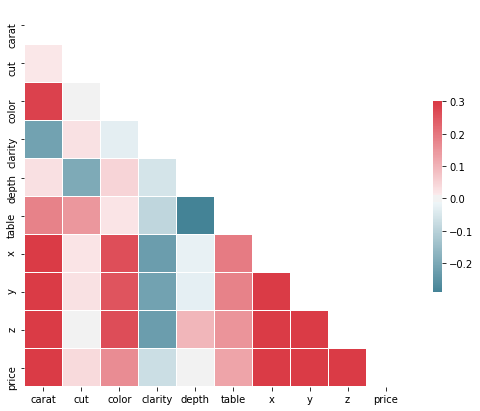

In [158]:
mask = np.zeros_like(corr_ma, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_ma, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Divido Diamantes en la X y la y para la prueba

In [159]:
#diamantes_train = diamantes_train.drop(["x","y","z"],axis =1)


X_diamantes = diamantes_train[diamantes_train.columns.difference(["price"])]
y_diamantes = diamantes_train["price"]
display(X_diamantes.head(),y_diamantes.head(),X_diamantes.shape)

,carat,clarity,color,cut,depth,table,x,y,z
0,1.21,5,4,2,63.0,57.0,6.73,6.70,4.23
1,0.28,7,0,4,64.0,56.0,4.14,4.17,2.66
2,0.42,4,2,3,61.2,58.0,4.86,4.82,2.96
3,0.26,1,4,2,61.1,57.0,4.16,4.12,2.53
4,1.10,2,3,1,63.4,57.0,6.52,6.55,4.14


0    6134
1     532
2    1103
3     600
4    4997
Name: price, dtype: int64

(40345, 9)

Vamos a estandarizar y normalizar los valores

In [163]:
def stand_Normalize(df):
    pipeline = [    
        StandardScaler(),
        Normalizer(),]
    transformer = make_pipeline(*pipeline)
    X_new = transformer.fit_transform(df)
    return pd.DataFrame(X_new, columns=df.columns)

diamantes = stand_Normalize(X_diamantes)
display(diamantes.shape)
display(diamantes)

(40345, 9)

,carat,clarity,color,cut,depth,table,x,y,z
0,0.373775,0.284826,0.354055,-0.229056,0.372630,-0.087456,0.381123,0.358591,0.425441
1,-0.263949,0.440322,-0.367732,0.339378,0.380656,-0.157437,-0.341687,-0.327362,-0.304042
2,-0.454918,0.052690,-0.197343,0.247706,-0.220344,0.137657,-0.441419,-0.451826,-0.472729
3,-0.339158,-0.489563,0.248510,-0.160774,-0.136136,-0.061385,-0.417323,-0.417910,-0.431955
4,0.243354,-0.400564,0.091765,-0.569616,0.436022,-0.077519,0.267155,0.268687,0.328261
...,...,...,...,...,...,...,...,...,...
40340,0.442022,0.185015,0.229984,0.119856,-0.087247,0.436856,0.427589,0.398660,0.403622
40341,-0.311788,-0.358528,-0.514146,-0.181725,-0.272169,-0.220121,-0.345204,-0.322758,-0.361951
40342,-0.190393,0.266408,0.565486,0.559412,0.125398,-0.437220,-0.140655,-0.134958,-0.123203
40343,0.128144,-0.462241,-0.097421,0.396369,-0.424978,0.571618,0.187164,0.203340,0.139933


In [164]:
diamantes = diamantes[["carat","cut","color","clarity","depth","table","x","y","z"]]
diamantes

,carat,cut,color,clarity,depth,table,x,y,z
0,0.373775,-0.229056,0.354055,0.284826,0.372630,-0.087456,0.381123,0.358591,0.425441
1,-0.263949,0.339378,-0.367732,0.440322,0.380656,-0.157437,-0.341687,-0.327362,-0.304042
2,-0.454918,0.247706,-0.197343,0.052690,-0.220344,0.137657,-0.441419,-0.451826,-0.472729
3,-0.339158,-0.160774,0.248510,-0.489563,-0.136136,-0.061385,-0.417323,-0.417910,-0.431955
4,0.243354,-0.569616,0.091765,-0.400564,0.436022,-0.077519,0.267155,0.268687,0.328261
...,...,...,...,...,...,...,...,...,...
40340,0.442022,0.119856,0.229984,0.185015,-0.087247,0.436856,0.427589,0.398660,0.403622
40341,-0.311788,-0.181725,-0.514146,-0.358528,-0.272169,-0.220121,-0.345204,-0.322758,-0.361951
40342,-0.190393,0.559412,0.565486,0.266408,0.125398,-0.437220,-0.140655,-0.134958,-0.123203
40343,0.128144,0.396369,-0.097421,-0.462241,-0.424978,0.571618,0.187164,0.203340,0.139933


Ahora voy a pasar el mismo filtro al dataset de test


In [165]:
diamantes_testeo = category(diamantes_test)
diamantes_testeo = stand_Normalize(diamantes_testeo)
diamantes_testeo = diamantes_testeo.drop(['Unnamed: 0'],axis =1)
display(diamantes_testeo)

,carat,cut,color,clarity,depth,table,x,y,z
0,-0.310144,-0.159296,0.238419,-0.142234,-0.356076,-0.192714,-0.351051,-0.348603,-0.360622
1,-0.268371,-0.149719,-0.423262,-0.458743,0.068991,-0.056344,-0.302791,-0.320188,-0.286185
2,0.374496,0.330308,0.326397,0.161858,-0.234278,0.057884,0.382807,0.378889,0.322075
3,-0.324259,-0.169916,0.254314,0.217192,0.012853,-0.063944,-0.399670,-0.391593,-0.371834
4,0.325091,-0.334451,0.307423,0.281919,0.345886,0.253324,0.297625,0.289532,0.324365
...,...,...,...,...,...,...,...,...,...
13444,0.184574,-0.194419,-0.129321,-0.173595,-0.359705,-0.397245,0.257566,0.300883,0.215582
13445,-0.313218,0.396078,0.063130,0.029255,0.030980,-0.183693,-0.404720,-0.400358,-0.378137
13446,0.371713,0.111253,-0.391062,0.176817,0.010464,0.293817,0.354322,0.372563,0.341396
13447,0.424808,0.098759,-0.081678,-0.109642,-0.242953,0.363163,0.413740,0.393929,0.343234


# Empezamos las pruebas de entrenamiento

## Pruebo el RandomForestRegressor

In [98]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr = RandomForestRegressor(max_depth=2, random_state=0)
paramsRandomForestREgresor = { 'max_depth': [50,230], 
 'min_samples_leaf': [2, 3],
 'min_samples_split': [2, 10],
 'n_estimators': [800, 600],
 "random_state": [10,50]}
diamantesRFR= regr.fit(X_train, y_train)
y_predRandom = regr.predict(X_test)

print(mean_squared_error(y_test, y_predRandom, squared=False))


1784.5373130057485


### Optimizamos RandomForest

In [166]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=7, oob_score=False,
                      random_state=150, verbose=0, warm_start=False)
ramdomregr= regr.fit(X_train, y_train)
y_predRandomregr = ramdomregr.predict(X_test)
print(mean_squared_error(y_test, y_predRandomregr, squared=False))

715.7503919958107


In [167]:
randomOpti = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features="sqrt", max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=370, n_jobs=None, oob_score=False,
                      random_state=230, verbose=0, warm_start=False)

In [168]:
ramdomOptimiza= randomOpti.fit(X_train, y_train)
y_predRandomOptim = ramdomOptimiza.predict(X_test)
print(mean_squared_error(y_test, y_predRandomOptim, squared=False))


721.5250561385383


In [175]:
y_predRFR= ramdomOptimiza.predict(diamantes_testeo)
display(y_predRFR.shape,diamantes_testeo.shape)
#Lo aplicamos para hacer la predicción

compareRFR = pd.DataFrame({"id":list(range(0,len(y_predRFR))),'price':y_predRFR})
display(compareRFR)

(13449,)

(13449, 9)

,id,price
0,0,579.331416
1,1,919.832432
2,2,8765.570270
3,3,542.461667
4,4,7229.589189
...,...,...
13444,13444,4922.651351
13445,13445,561.372973
13446,13446,12136.632432
13447,13447,10546.678378


Creo un csv para subirlo

In [176]:
compareRFR.to_csv('../Output//sample_submissionRandomREgresion.csv',index=False)

## Voy a probar el GradientBoostingRegressor

In [177]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
gradient = ensemble.GradientBoostingRegressor( n_estimators = 150,max_depth = 6,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesGBR = gradient.fit(X_train, y_train)
y_predGradienet = gradient.predict(X_test)
print(mean_squared_error(y_test, y_predGradienet, squared=False))

732.4062763978295


In [178]:
y_predGBR= diamantesGBR.predict(diamantes_testeo)
compareGBR = pd.DataFrame({"id":range(len(y_predGBR)),"price":y_predGBR})

In [179]:
compareGBR.to_csv('../Output//sample_submissionGradientBoostingRegressor.csv',index=False)


## Practamos con el modelo GradientBoostingRegressor

In [180]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  

gradient = ensemble.GradientBoostingRegressor( loss= "huber",n_estimators = 50,max_depth = 8,
                                             min_samples_split = 3,learning_rate = 0.1)
diamantesRFR = gradient.fit(X_train, y_train)
y_pred = diamantesRFR.predict(X_test)

print(mean_squared_error(y_test, y_pred,squared=False))

779.8120503135682


In [181]:
params = { 
           'learning_rate':[0.15,0.1,0.05], 
           'n_estimators':[50,2750],                    
          "random_state": [3,10,100]          
         }
tuning = GridSearchCV(estimator=gradient,param_grid=params,scoring="r2",verbose = 10, n_jobs=7, cv=5)

resultado = optimizar_modelos(tuning,diamantes,y_diamantes)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   25.8s
[Parallel(n_jobs=7)]: Done  11 tasks      | elapsed:   45.9s
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed: 22.0min
[Parallel(n_jobs=7)]: Done  27 tasks      | elapsed: 43.8min
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 44.7min
[Parallel(n_jobs=7)]: Done  47 tasks      | elapsed: 67.5min
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed: 89.9min
[Parallel(n_jobs=7)]: Done  71 tasks      | elapsed: 91.1min
[Parallel(n_jobs=7)]: Done  87 out of  90 | elapsed: 135.5min remaining:  4.7min
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed: 148.0min finished


0.9666991709725075
Hecho en 9695.137s
Mejor  estimator encontado en la busqueda es:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=8, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=2750,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [192]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)
GradientOptimizado = ensemble.GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=8, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=2750,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=3, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
GradientOptimizado = GradientOptimizado.fit(X_train, y_train)
y_predGradienetOptimizado = GradientOptimizado.predict(X_test)

print(mean_squared_error(y_test, y_predGradienetOptimizado,squared=False))

689.0889619543268


In [196]:
y_predGRedhop = GradientOptimizado.predict(diamantes_testeo)
compareGrandEstimacion2 = pd.DataFrame({"id":range(len(y_predGRedhop)),"price":y_predGRedhop })

compareGrandEstimacion2.to_csv('../Output//sample_submissionGradientBoostingRegressorOPt.csv',index=False)

## Voy a probar la PLSRegression


In [183]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)        

from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=100, scale=True, max_iter=500, tol=1e-06, copy=True)
m = pls2.fit(X_train, y_train)
y_predpls2 = m.predict(X_test)  
print(mean_squared_error(y_test, y_predpls2)))
#r2_score = 0.8489243795102168                     

SyntaxError: invalid syntax (<ipython-input-183-8c529836aaa8>, line 6)

In [ ]:
#Probando en colab

c =['newton-cg', 'sag', 'saga' , 'lbfgs' ]
for e in c:
    X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)        
    print("modelo:  "  ,e)
    model = LogisticRegression(C=10,random_state=12 ,solver=e,n_jobs=6)
    m = model.fit(X_train, y_train)
    y_pred = m.predict(X_test) 
    print("Terminado el modelo:  "  ,e)
    print(r2_score(y_test, y_pred))    
    
"""modelo:   newton-cg
Terminado el modelo:   newton-cg
0.7331343469414701
modelo:   sag
Terminado el modelo:   sag
0.6993192236265758
modelo:   saga
Terminado el modelo:   saga
0.7049012313114302
modelo:   lbfgs
Terminado el modelo:   lbfgs
0.7451729344305205
"""

## Entrenando HistGradientBoostingRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
histaGBR = HistGradientBoostingRegressor(max_iter =100,max_leaf_nodes=50)
params = { 'learning_rate':[0.15,0.1,0.05], 
           'max_bins':[50,230],
           'random_state':[50, 100],
           'min_samples_leaf': [150, 100]}
resultasoHGBR = optimizar_modelos(histaGBR,diamantes,y_diamantes)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
historiGrand=HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring='neg_mean_absolute_error', tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


historiGrandEstimacion =  historiGrand.fit(X_train, y_train)
y_pred = historiGrandEstimacion.predict(X_test)
print(mean_squared_error(y_test, y_pred,squared=False))

739.7815972002707


In [185]:
y_predhGE = historiGrandEstimacion.predict(diamantes_testeo)

In [ ]:
comparehistoriGrandEstimacion2 = pd.DataFrame({"id":range(len(y_predhGE)),"price":y_predhGE })
comparehistoriGrandEstimacion2.shape
comparehistoriGrandEstimacion2.to_csv('../Output//sample_submissionHitGradientBoostingRegressor.csv',index=False)

## Uso estimadores para intentar optimizar el resultado con StackingRegressor

In [186]:
estimators = [
 ('lr', RidgeCV()),
 ('svr', LinearSVR(random_state=42)),
 ("AdaBoostRegressor",   AdaBoostRegressor(random_state=0, n_estimators=100)),
 ("RANSACR", RANSACRegressor(random_state=0)),
 ("GradientBoostingRegressor",ensemble.GradientBoostingRegressor( loss= "huber",n_estimators = 50,max_depth = 8,
                                             min_samples_split = 3,learning_rate = 0.1))
]
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))

X_train, X_test, y_train, y_test = train_test_split(diamantes, y_diamantes, random_state=42)
modelotop = reg.fit(X_train, y_train)


In [187]:
y_predmodelotop= modelotop.predict(X_test)

print(mean_squared_error(y_test, y_predmodelotop, squared=False))


772.6356577029239


### Vamos a crear un csv con el


In [ ]:
y_predmodelotop2 = modelotop.predict(diamantes_testeo)
comparemodelotop = pd.DataFrame(y_predmodelotop2).reset_index()

comparemodelotop.to_csv('../Output//sample_submissioncomparemodelotop.csv',index=False,header=["id","price"])

## Ahora con estimador de union intentare mejorar el resultado con VotingRegressor 

In [205]:
X_train, X_test, y_train, y_test = train_test_split(diamantes, y_diamantes, random_state=42)
from sklearn.ensemble import VotingRegressor
historiGrand = HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.17,
                              loss='least_squares', max_bins=230,
                              max_depth=None, max_iter=150, max_leaf_nodes=50,
                              min_samples_leaf=60, n_iter_no_change=None,
                              random_state=10, scoring=None, tol=1e-07,
                              validation_fraction=0.3, verbose=0,
                              warm_start=False)



solucion = VotingRegressor([('lr', modelotop), ('rf', historiGrand)])
solucionVoting = solucion.fit(X_train, y_train)
solucionVoting3 =solucionVoting.predict(X_test)
print(mean_squared_error(y_test, solucionVoting3, squared=False))

695.8765610147879


In [206]:

y_predVRHMTOP= solucionVoting.predict(diamantes_testeo)
display(y_predVRHMTOP.shape,diamantes_testeo.shape)

compareVotingRegresorhistyModelotop= pd.DataFrame({"id":range(len(y_predVRHMTOP)),"price":y_predVRHMTOP})
compareVotingRegresorhistyModelotop.to_csv('../Output//sample_submissionVotingRegresor(histyModelotop).csv',index=False)


(13449,)

(13449, 9)

## Optimizo HistGradientBoostingRegressor

In [ ]:
histaGBR = HistGradientBoostingRegressor(max_iter =100,max_leaf_nodes=50)
params = { 'learning_rate':[0.15,0.18,0.17], 
           'max_bins':[230],
           'random_state':[10, 17],
           'min_samples_leaf': [60, 59],
            "validation_fraction":[0.3,0.1,0.2]}



In [198]:

#resultasoHGBR = optimizar_modelos(histaGBR,diamantes,y_diamantes)
X_train, X_test, y_train, y_test = train_test_split(diamantes,y_diamantes,test_size=0.2)  
historiGrand=HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.15,
                              loss='least_squares', max_bins=50, max_depth=None,
                              max_iter=100, max_leaf_nodes=50,
                              min_samples_leaf=50, n_iter_no_change=None,
                              random_state=50, scoring='neg_mean_absolute_error', tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


historiGrandEstimacion =  historiGrand.fit(X_train, y_train)
y_predHGE = historiGrandEstimacion.predict(X_test)
print(mean_squared_error(y_test, y_predHGE, squared=False))

741.8290565907952


In [199]:
y_predHGEtext = historiGrandEstimacion.predict(diamantes_testeo)
compareHistacolab = pd.DataFrame(y_predHGEtext).reset_index()
compareHistacolab
compareHistacolab.to_csv('../Output//sample_submissionhistoriGrand.csv',index=False,header=["id","price"])

In [197]:
histaColab = HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.17,
                              loss='least_squares', max_bins=230,
                              max_depth=None, max_iter=150, max_leaf_nodes=50,
                              min_samples_leaf=60, n_iter_no_change=None,
                              random_state=10, scoring=None, tol=1e-07,
                              validation_fraction=0.3, verbose=0,
                              warm_start=False)

histaColab =  histaColab.fit(X_train, y_train)
y_predHistaColab = histaColab.predict(X_test)
print(mean_squared_error(y_test, y_predHistaColab, squared=False))

685.5671706163139


In [200]:
y_predHistaColab = histaColab.predict(diamantes_testeo)
compareHistacolab = pd.DataFrame(y_predHistaColab).reset_index()
compareHistacolab

,index,0
0,0,547.763905
1,1,919.226594
2,2,9467.735770
3,3,578.395708
4,4,8071.383253
...,...,...
13444,13444,4582.253370
13445,13445,547.005771
13446,13446,13373.267778
13447,13447,9035.626552


In [201]:
compareHistacolab.to_csv('../Output//sample_submissionHistacolab.csv',index=False,header=["id","price"])